In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory




In [54]:
# importing libraries

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

import warnings
warnings.filterwarnings("ignore")

In [55]:
# function which plots ibm stock prices: real and predicted both

def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real IBM stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("IBM stock price prediction")
    plt.xlabel("time")
    plt.ylabel("IBM stock price")
    plt.legend()
    plt.show()

In [56]:
# function which calculates root mean squared error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [67]:
# import yfinance as yf

# ticker = "AAPL"
# start_date = "2006-01-03"
# end_date = "2019-04-20"
# data = yf.download(ticker, start=start_date, end=end_date)
data = pd.read_csv("IBM.csv", index_col='Date', parse_dates=["Date"])


In [68]:
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM


In [58]:
# #Print the shape of Dataframe  and Check for Null Values
# # print(“Dataframe Shape: “, df. shape)
# print(df.shape)
# print(df.isnull().values.any())

(1028, 6)
False


In [61]:
# data=data.drop('Adj Close',axis=1)

In [69]:
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM


In [70]:
train = data[:'2016'].iloc[:,1:2].values
test = data['2017':].iloc[:,1:2].values

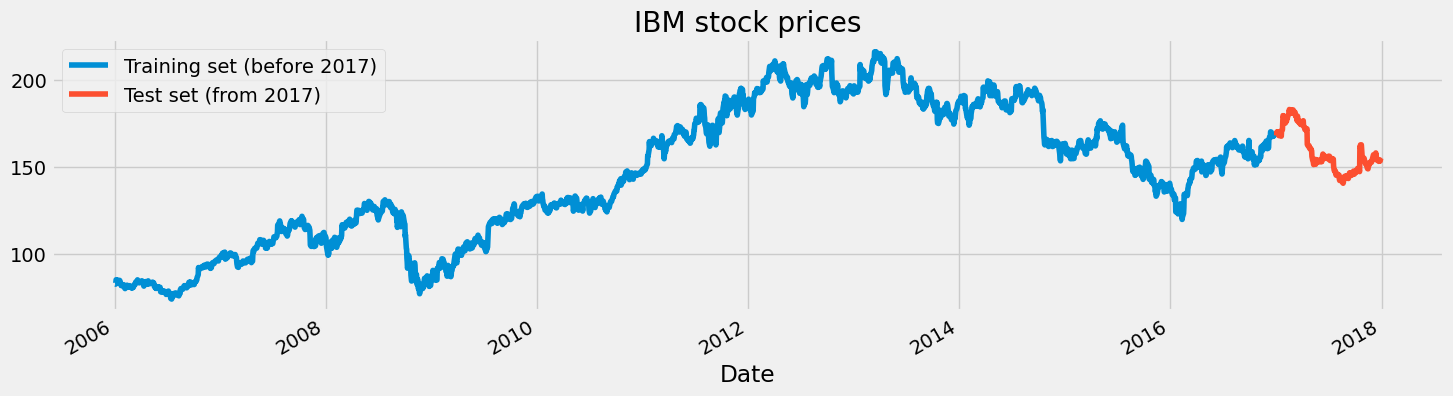

In [71]:
data["High"][:'2016'].plot(figsize=(16,4), legend=True)
data["High"]["2017":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (from 2017)"])
plt.title("IBM stock prices")
plt.show()

In [72]:
# scaling the training set

sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [73]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements

x_train = []
y_train = []

for i in range(60,2769):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [74]:
x_train[0]

array([0.06065089, 0.06029868, 0.06311637, 0.0781206 , 0.07262609,
       0.07171034, 0.07657087, 0.07058326, 0.0669907 , 0.06494787,
       0.075796  , 0.07361229, 0.06417301, 0.05621302, 0.05783319,
       0.05409975, 0.05431107, 0.05515638, 0.05543815, 0.05677656,
       0.05846717, 0.05388842, 0.04811214, 0.04233587, 0.04402649,
       0.0490279 , 0.04832347, 0.05297267, 0.05614258, 0.05290223,
       0.05325444, 0.04909834, 0.04994365, 0.04797126, 0.05431107,
       0.05212736, 0.04726684, 0.04895745, 0.04656241, 0.04839391,
       0.04416737, 0.0485348 , 0.04719639, 0.04825303, 0.05395886,
       0.05663567, 0.05853762, 0.05959425, 0.06375035, 0.06917442,
       0.06889265, 0.06670893, 0.06910397, 0.07783883, 0.07565511,
       0.07276698, 0.06889265, 0.0656523 , 0.06656805, 0.06769513])

In [75]:
y_train[0]

0.06875176105945335

In [76]:
len(x_train)

2709

In [77]:
len(y_train)

2709

In [78]:
x_train.shape

(2709, 60)

In [79]:
y_train.shape

(2709,)

In [80]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [81]:
x_train.shape

(2709, 60, 1)

In [82]:
regressor = Sequential()

In [85]:
# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [86]:
# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [87]:
# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [88]:
# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [89]:
# the output layer

regressor.add(Dense(units=1))

In [90]:
# compiling the LSTM RNN network

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [91]:
# fit to the training set

regressor.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
85/85 [==============================] - 34s 224ms/step - loss: 0.0329
Epoch 2/5
85/85 [==============================] - 25s 291ms/step - loss: 0.0137
Epoch 3/5
85/85 [==============================] - 18s 208ms/step - loss: 0.0102
Epoch 4/5
85/85 [==============================] - 18s 206ms/step - loss: 0.0080
Epoch 5/5
85/85 [==============================] - 18s 216ms/step - loss: 0.0075


In [92]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['High'][:'2016'], data['High']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(3020,)
(311,)
(311, 1)
(311, 1)


In [93]:
# preparing x_test

x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [94]:
# predicting the stock prices for test set

predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

8/8 [==============================] - 3s 69ms/step


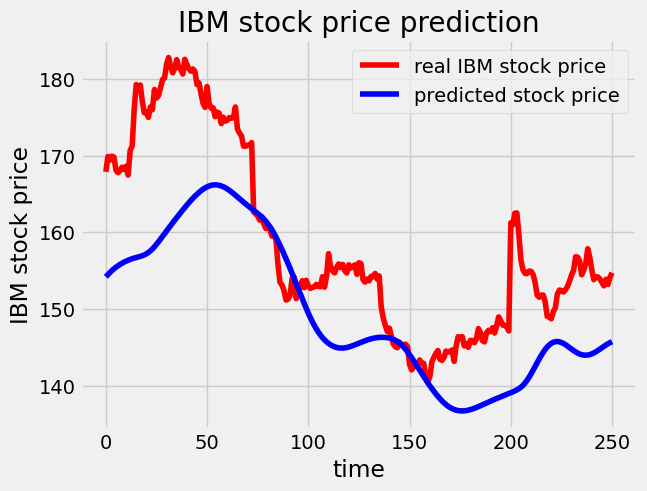

In [95]:
# visualizing the results: predicted vs test

plot_predictions(test, predicted)

In [96]:
# evaluating the model

return_rmse(test, predicted)

the root mean squared error is : 10.895136921809707.


In [ ]:
# # Gated Recurrent Units

# # In simple words, the GRU unit does not have to use a
#  memory unit to control the flow of information like the LSTM unit.
#   It can directly makes use of the all hidden states without any control.
#    GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. 
#    But, with large data, the LSTMs with higher expressiveness may lead to better results.

# # They are almost similar to LSTMs except that they have two gates:
#  reset gate and update gate. Reset gate determines how to combine new input to previous memory and
#   update gate determines how much of the previous state to keep. Update gate in GRU is what input gate 
#   and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the output,
#    .neither they have the output gate.

In [97]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [98]:
# compiling the model

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

In [99]:
# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
19/19 [==============================] - 16s 259ms/step - loss: 0.1110
Epoch 2/5
19/19 [==============================] - 7s 376ms/step - loss: 0.0334
Epoch 3/5
19/19 [==============================] - 7s 345ms/step - loss: 0.0078
Epoch 4/5
19/19 [==============================] - 6s 322ms/step - loss: 0.0050
Epoch 5/5
19/19 [==============================] - 5s 248ms/step - loss: 0.0043


8/8 [==============================] - 2s 31ms/step


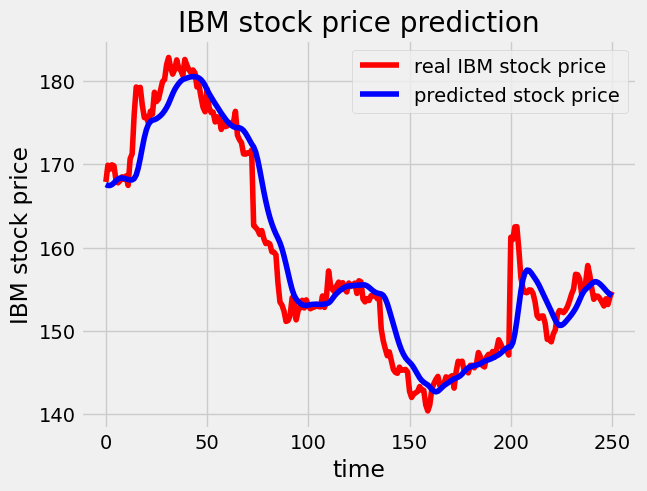

In [100]:
# predicting the stock prices for test set and visualization

predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

plot_predictions(test, predicted_with_gru)

In [101]:
# evaluating the model performance

return_rmse(test, predicted_with_gru)

the root mean squared error is : 3.2714326768304085.
